# Mapping 

# Map Components: 

- Ego Vehicle : 
    * its trajectory last T seconds.

- Adjacent Objects: 
    * center x, center y, width, height, object type

- Lane Lines: 
    * binary mask indicating whether point `(u, v)` in image is lane or not.

- Drivable Area: 
    * `(x, y, z)` points in lidar coordinate.


### Goal : 
Genertate map centered around **town center** holding all these information.

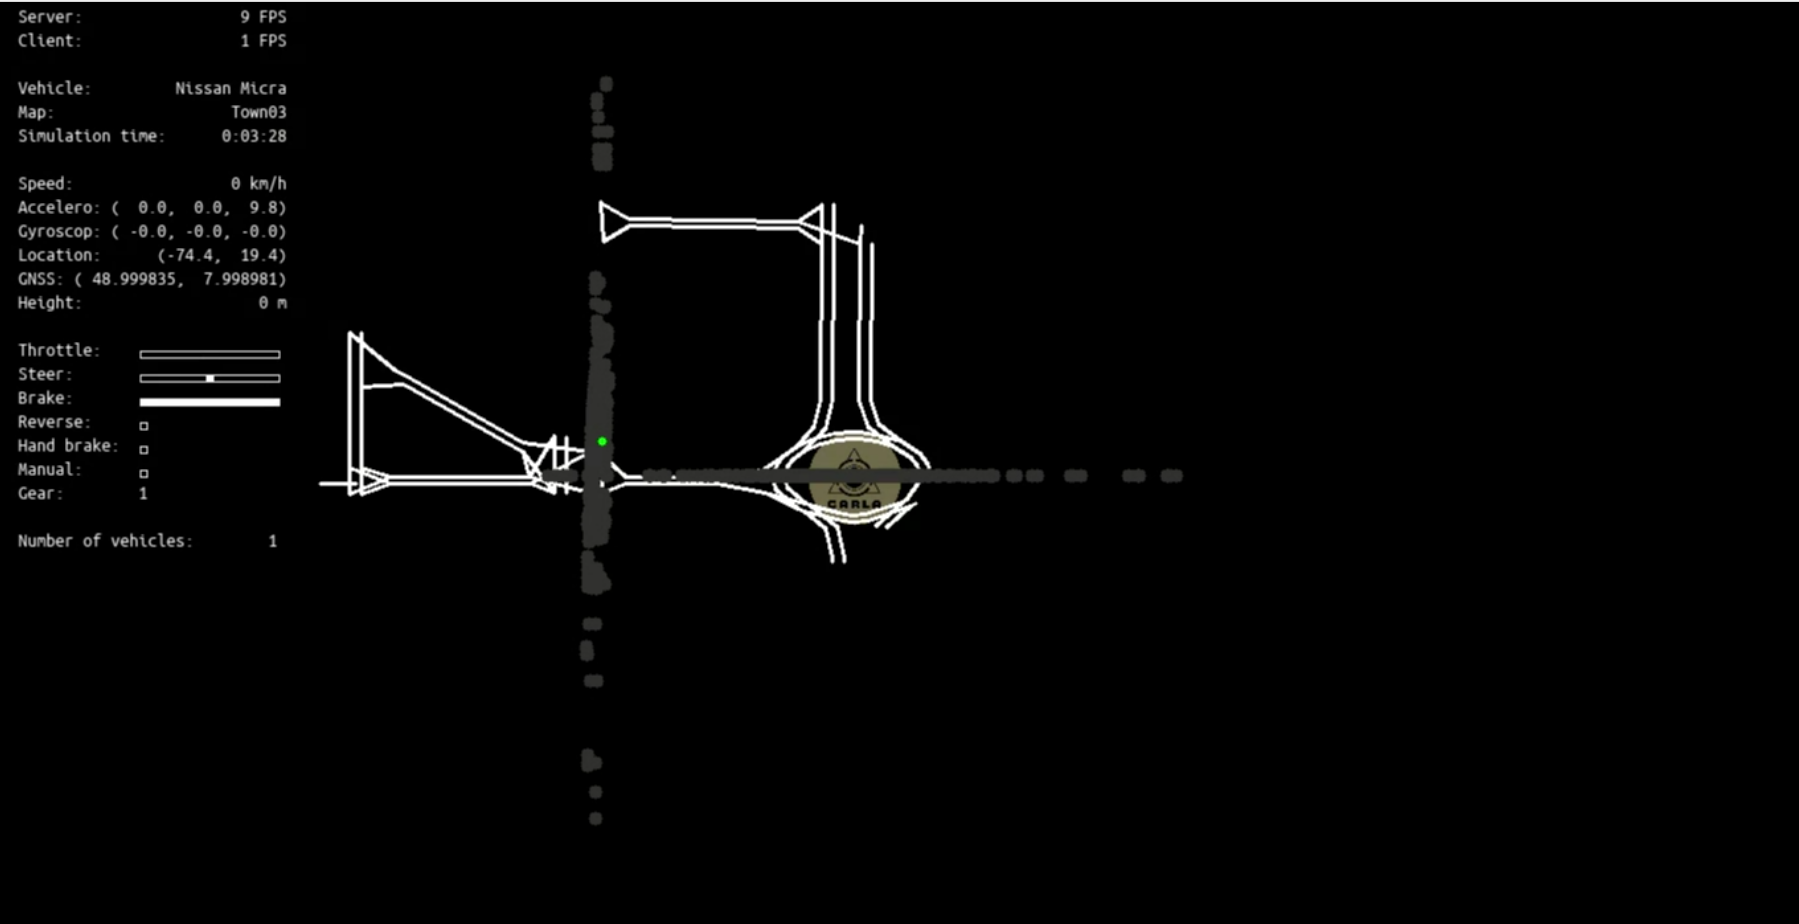

# Ego Vehicle : 

gathered from **Localization** 

- x,y in world coordinates

# Lane Lines & Objects: 

- Detected using Camera in image coordinate.

# Lane Lines: 

- Detected using Camera in image coordinate

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


/home/mahmoud/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from geometry import *


[37.56991041 27.52511796] [ True]
[86.73455235 43.3787223 ] [False]
[96.07533403 59.67274837] [False]
[38.00028181 52.34372382] [False]
[19.68770059 41.50911804] [ True]
[ 0.41252797 45.83707809] [False]
[91.08811093 72.57614044] [False]
[86.2507315  58.86823801] [False]
[51.76053817 36.60955605] [False]
[60.3352005  9.3391746] [ True]
[24.32560547 44.82694016] [ True]
[41.75647943 35.38942713] [ True]
[15.68577251 86.63671655] [False]
[42.68173937  6.47557727] [ True]
[69.73402892 16.16715383] [False]
[76.47054441 54.3691272 ] [False]
[61.52842621 32.32866605] [False]
[45.78973332 21.0493752 ] [ True]
[ 6.90541722 32.12966106] [False]
[72.82425764 58.54667887] [False]
[29.95909553 21.88668712] [ True]
[20.86472798 38.31411194] [ True]
[53.8426713  33.18538516] [False]
[73.74111463  8.19946532] [False]
[24.61288373 52.19503569] [ True]
[16.2172671  86.16896787] [False]
[ 9.79890381 83.7771094 ] [False]
[71.99151472 56.23608431] [False]
[53.30287203 21.02051448] [ True]
[55.06142401 99.

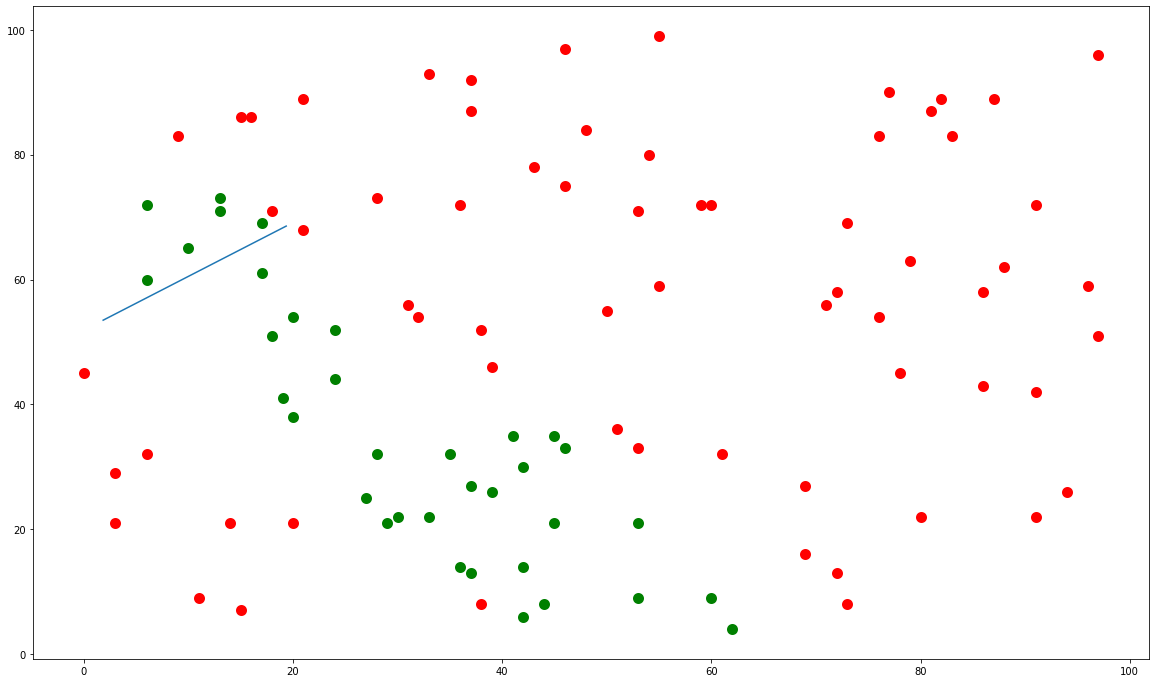

In [52]:

del max
# a = np.array([[3], [4]])
# b = np.array([[4], [0]])
a = np.random.rand(2, 1) * 100
b = np.random.rand(2, 1) * 100

# x = np.array([[1, 1], [3, 5], [6, 2], [6, 4]])
x = np.random.rand(100, 2) * 100
x_limit = max(x.max(), a.max(), b.max())
max = int(x_limit) + 1

canvas = np.zeros((max, max, 3), dtype=np.uint8)
plt.figure(figsize=(20, 12))
plt.plot([a[0], b[0]], [a[1], b[1]], markersize=20)
# plt.grid()
in_between = point_between_2points(a, b, x.T)


for i in range(len(x)) : 
    print(x[i], in_between[i])

for i in range(x.shape[0]):
    if in_between[i][0] : 
        canvas[int(x[i][0]), int(x[i][1]), :] = 255
        plt.scatter(int(x[i][0]), int(x[i][1]), c='g', linewidths=5)
    else : 
        plt.scatter(int(x[i][0]), int(x[i][1]), c='r', linewidths=5)

        canvas[int(x[i][0]), int(x[i][1]), :] = (255, 0, 0)

# plt.xticks(range(max))
# plt.yticks(range(max))
plt.show()

In [2]:
import cv2

img_path = "/media/mahmoud/New Volume/faculty/level2/study/machine learning/Towards Enhanced Autonomous Vehicle/carla/output/1719960036.png"
img = cv2.imread(img_path)


In [3]:
img.shape

(600, 800, 3)

In [ ]:
speed = 0.5
h, w = img.shape[:2]
bottom_left = (0, h)
bottom_right = (w, h)
top_left = (int(0.2*w), h-speed*h)
top_right = (int(0.8*w), h-speed*h)


top_left = 